In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.signal import find_peaks
sns.set_theme('poster')
%config InlineBackend.figure_format = 'retina'

import os
from lmfit.models import LinearModel,VoigtModel,SplineModel,LinearModel

In [5]:
def open_mca_data(file_name):
    with open(file_name, 'r', encoding='ansi') as file:
        content = file.readlines()
    data = False
    datas = []
    for i in content:
        if i =='<<END>>\n':
            data = False
        if data:
            datas.append(eval(i))
        if i =='<<DATA>>\n':
            data = True
    datas = np.array(datas)
    return datas

# Best shaping time

In [6]:
shaping_raw_datas = os.listdir('raw_data/')[2:16]
shaping_datas_dic = {eval(i.split('.')[0][2:].replace('_','.'))
                     :open_mca_data('raw_data/'+i) 
                     for i in shaping_raw_datas}
shaping_datas = pd.DataFrame(shaping_datas_dic)
shaping_datas = shaping_datas.sort_index(axis=1)
shaping_datas

,0.8,2.4,4.0,5.6,8.0,11.2,16.0,22.4,25.6,32.0,44.8,64.0,89.6,102.4
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1020,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1021,0,0,0,1,0,0,0,0,1,0,1,0,0,1
1022,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [7]:
shaping_datas.drop(index = [i for i in range(150)], inplace=True)
shaping_datas

,0.8,2.4,4.0,5.6,8.0,11.2,16.0,22.4,25.6,32.0,44.8,64.0,89.6,102.4
150,2,1,1,2,0,1,1,0,0,1,0,1,2,0
151,1,0,1,1,0,3,0,1,0,2,0,1,1,0
152,2,2,0,1,0,2,2,1,0,0,3,0,0,0
153,0,2,1,0,2,0,1,0,0,0,4,0,2,0
154,2,0,2,0,0,0,1,0,0,2,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1020,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1021,0,0,0,1,0,0,0,0,1,0,1,0,0,1
1022,0,0,0,0,0,0,0,0,0,0,1,0,0,0


array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

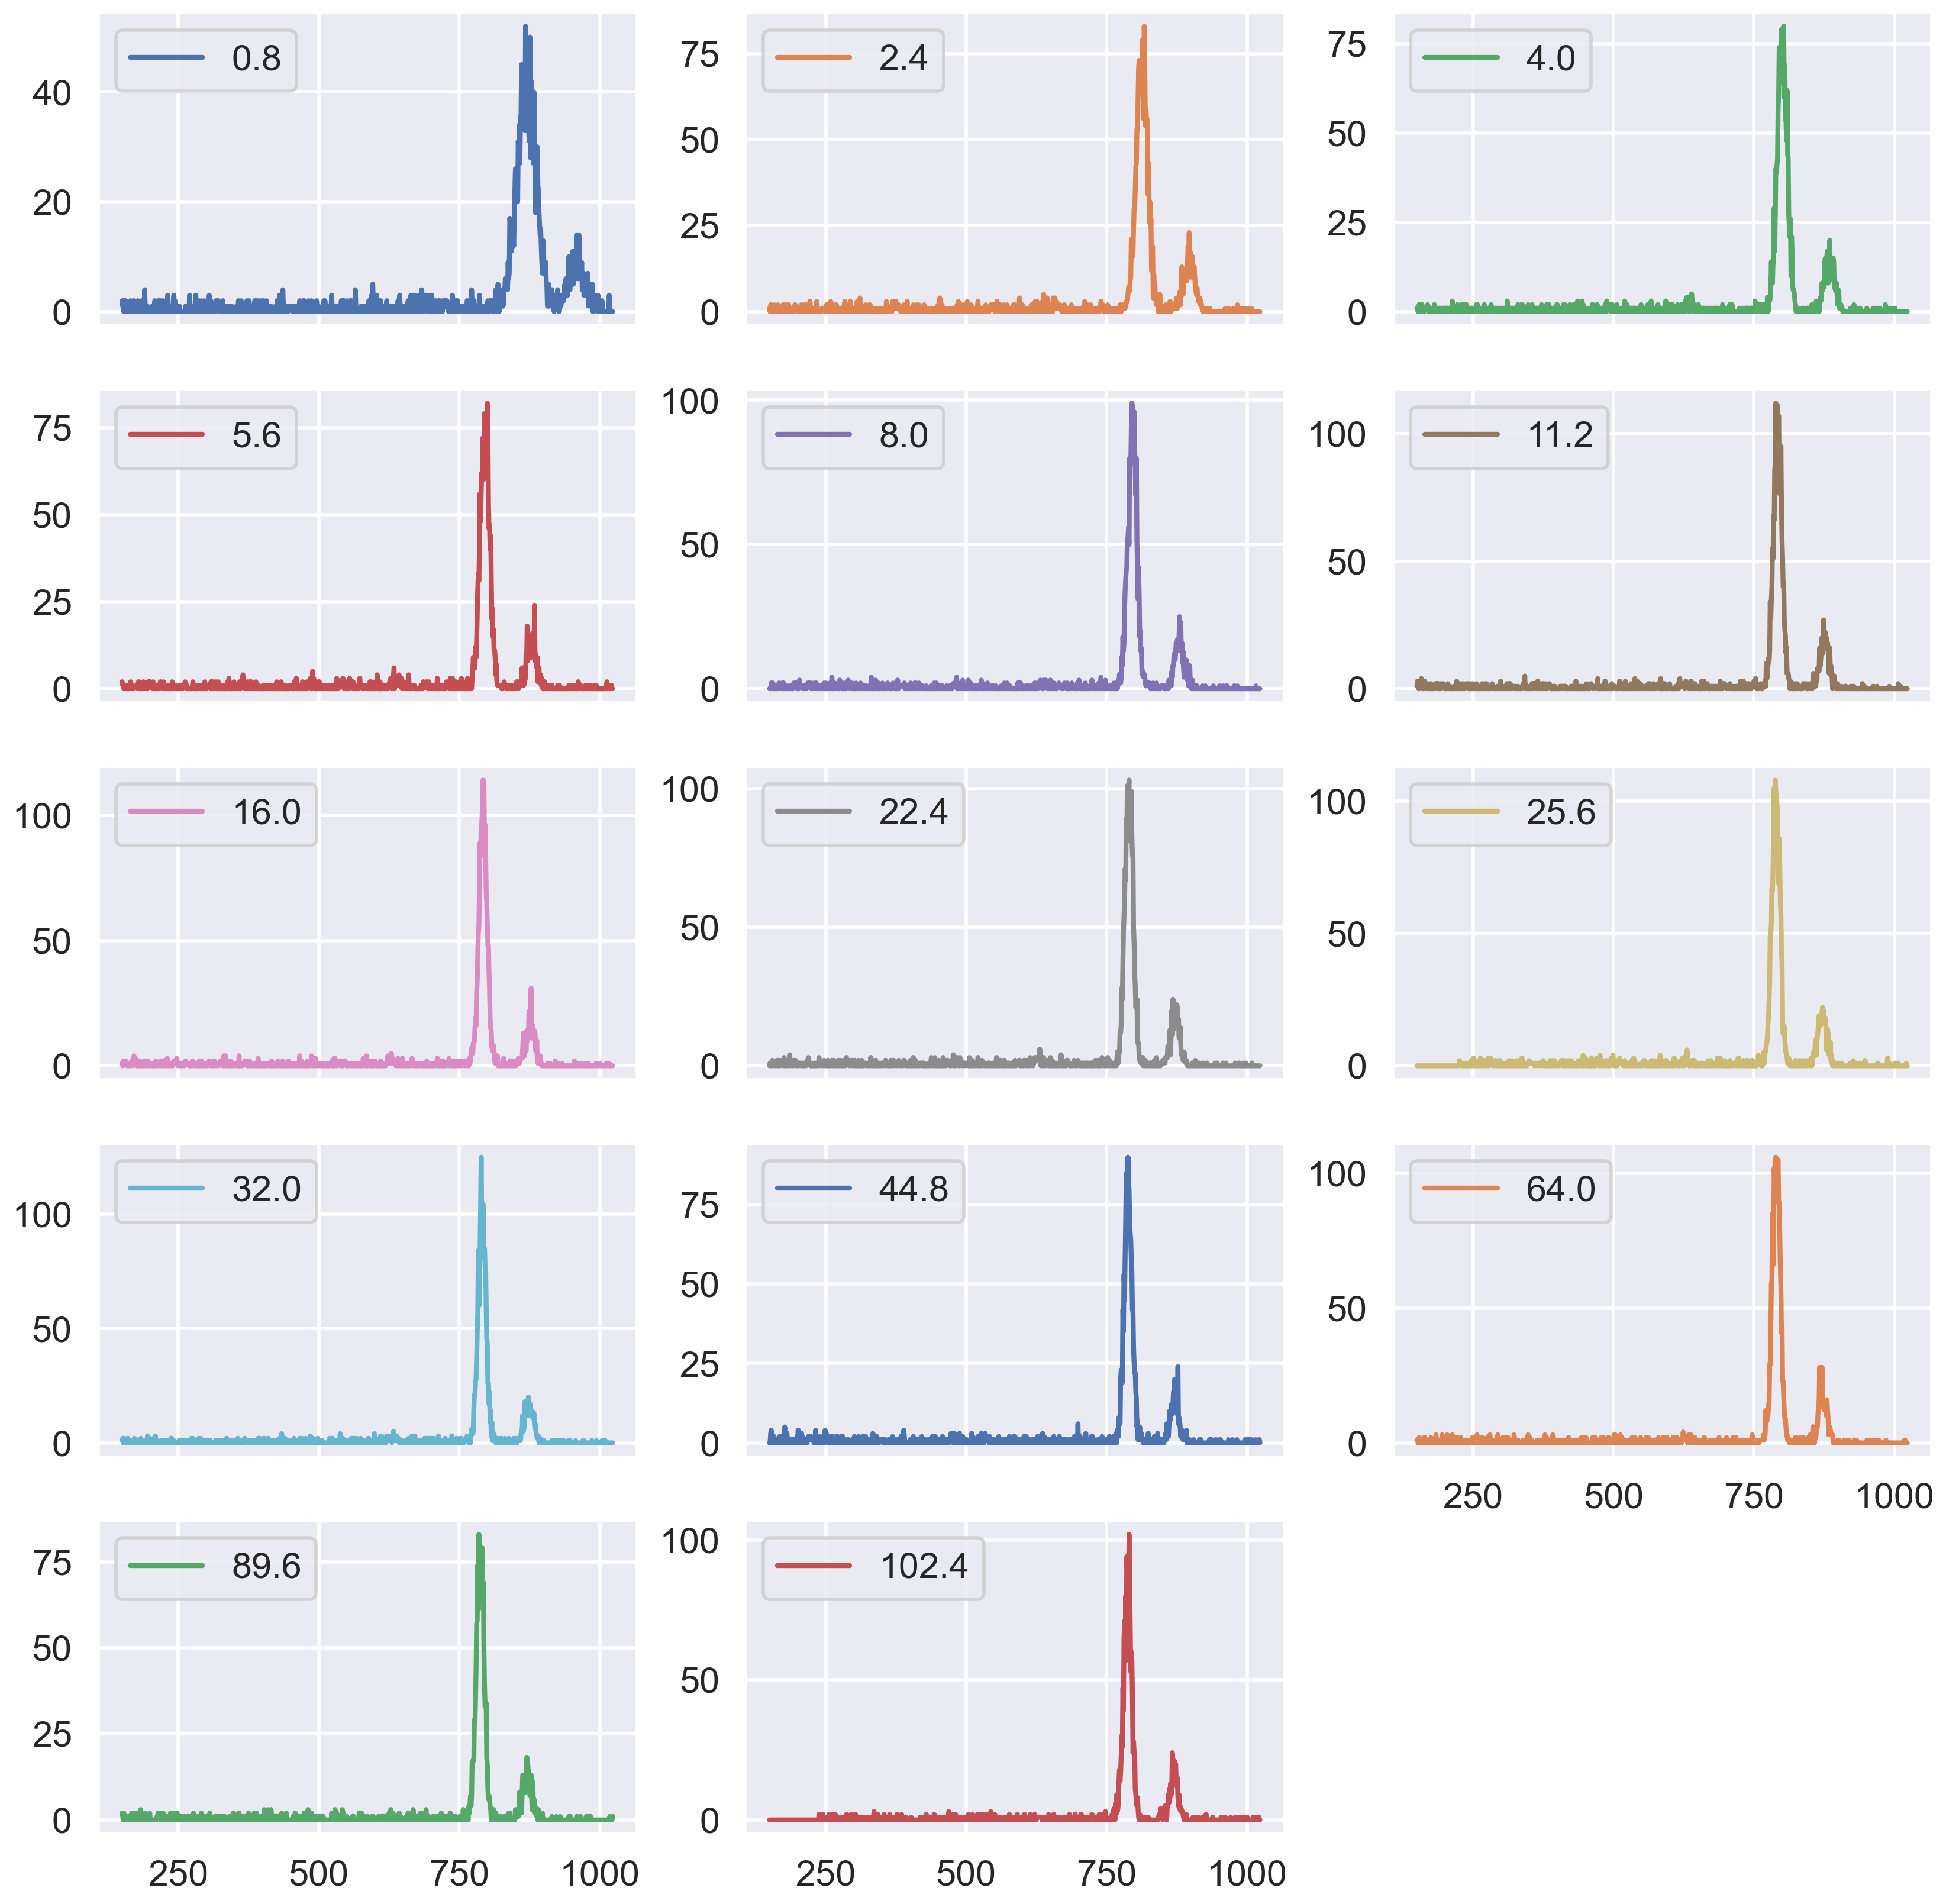

In [8]:
shaping_datas.plot(subplots=True, layout = (5,3) , figsize=(20,20))

# Element_Celebration

In [9]:
elements = ['Tb','Ba','Ag','Mo','Rb']#,'Cu'] 
element_datas = pd.DataFrame({})
for element in elements:
    data = open_mca_data("raw_data\\"+element+'.mca')
    element_datas[element] = data
element_datas

,Tb,Ba,Ag,Mo,Rb
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
1019,0,5,0,0,2
1020,0,1,2,2,1
1021,1,2,3,1,3
1022,2,1,0,2,7


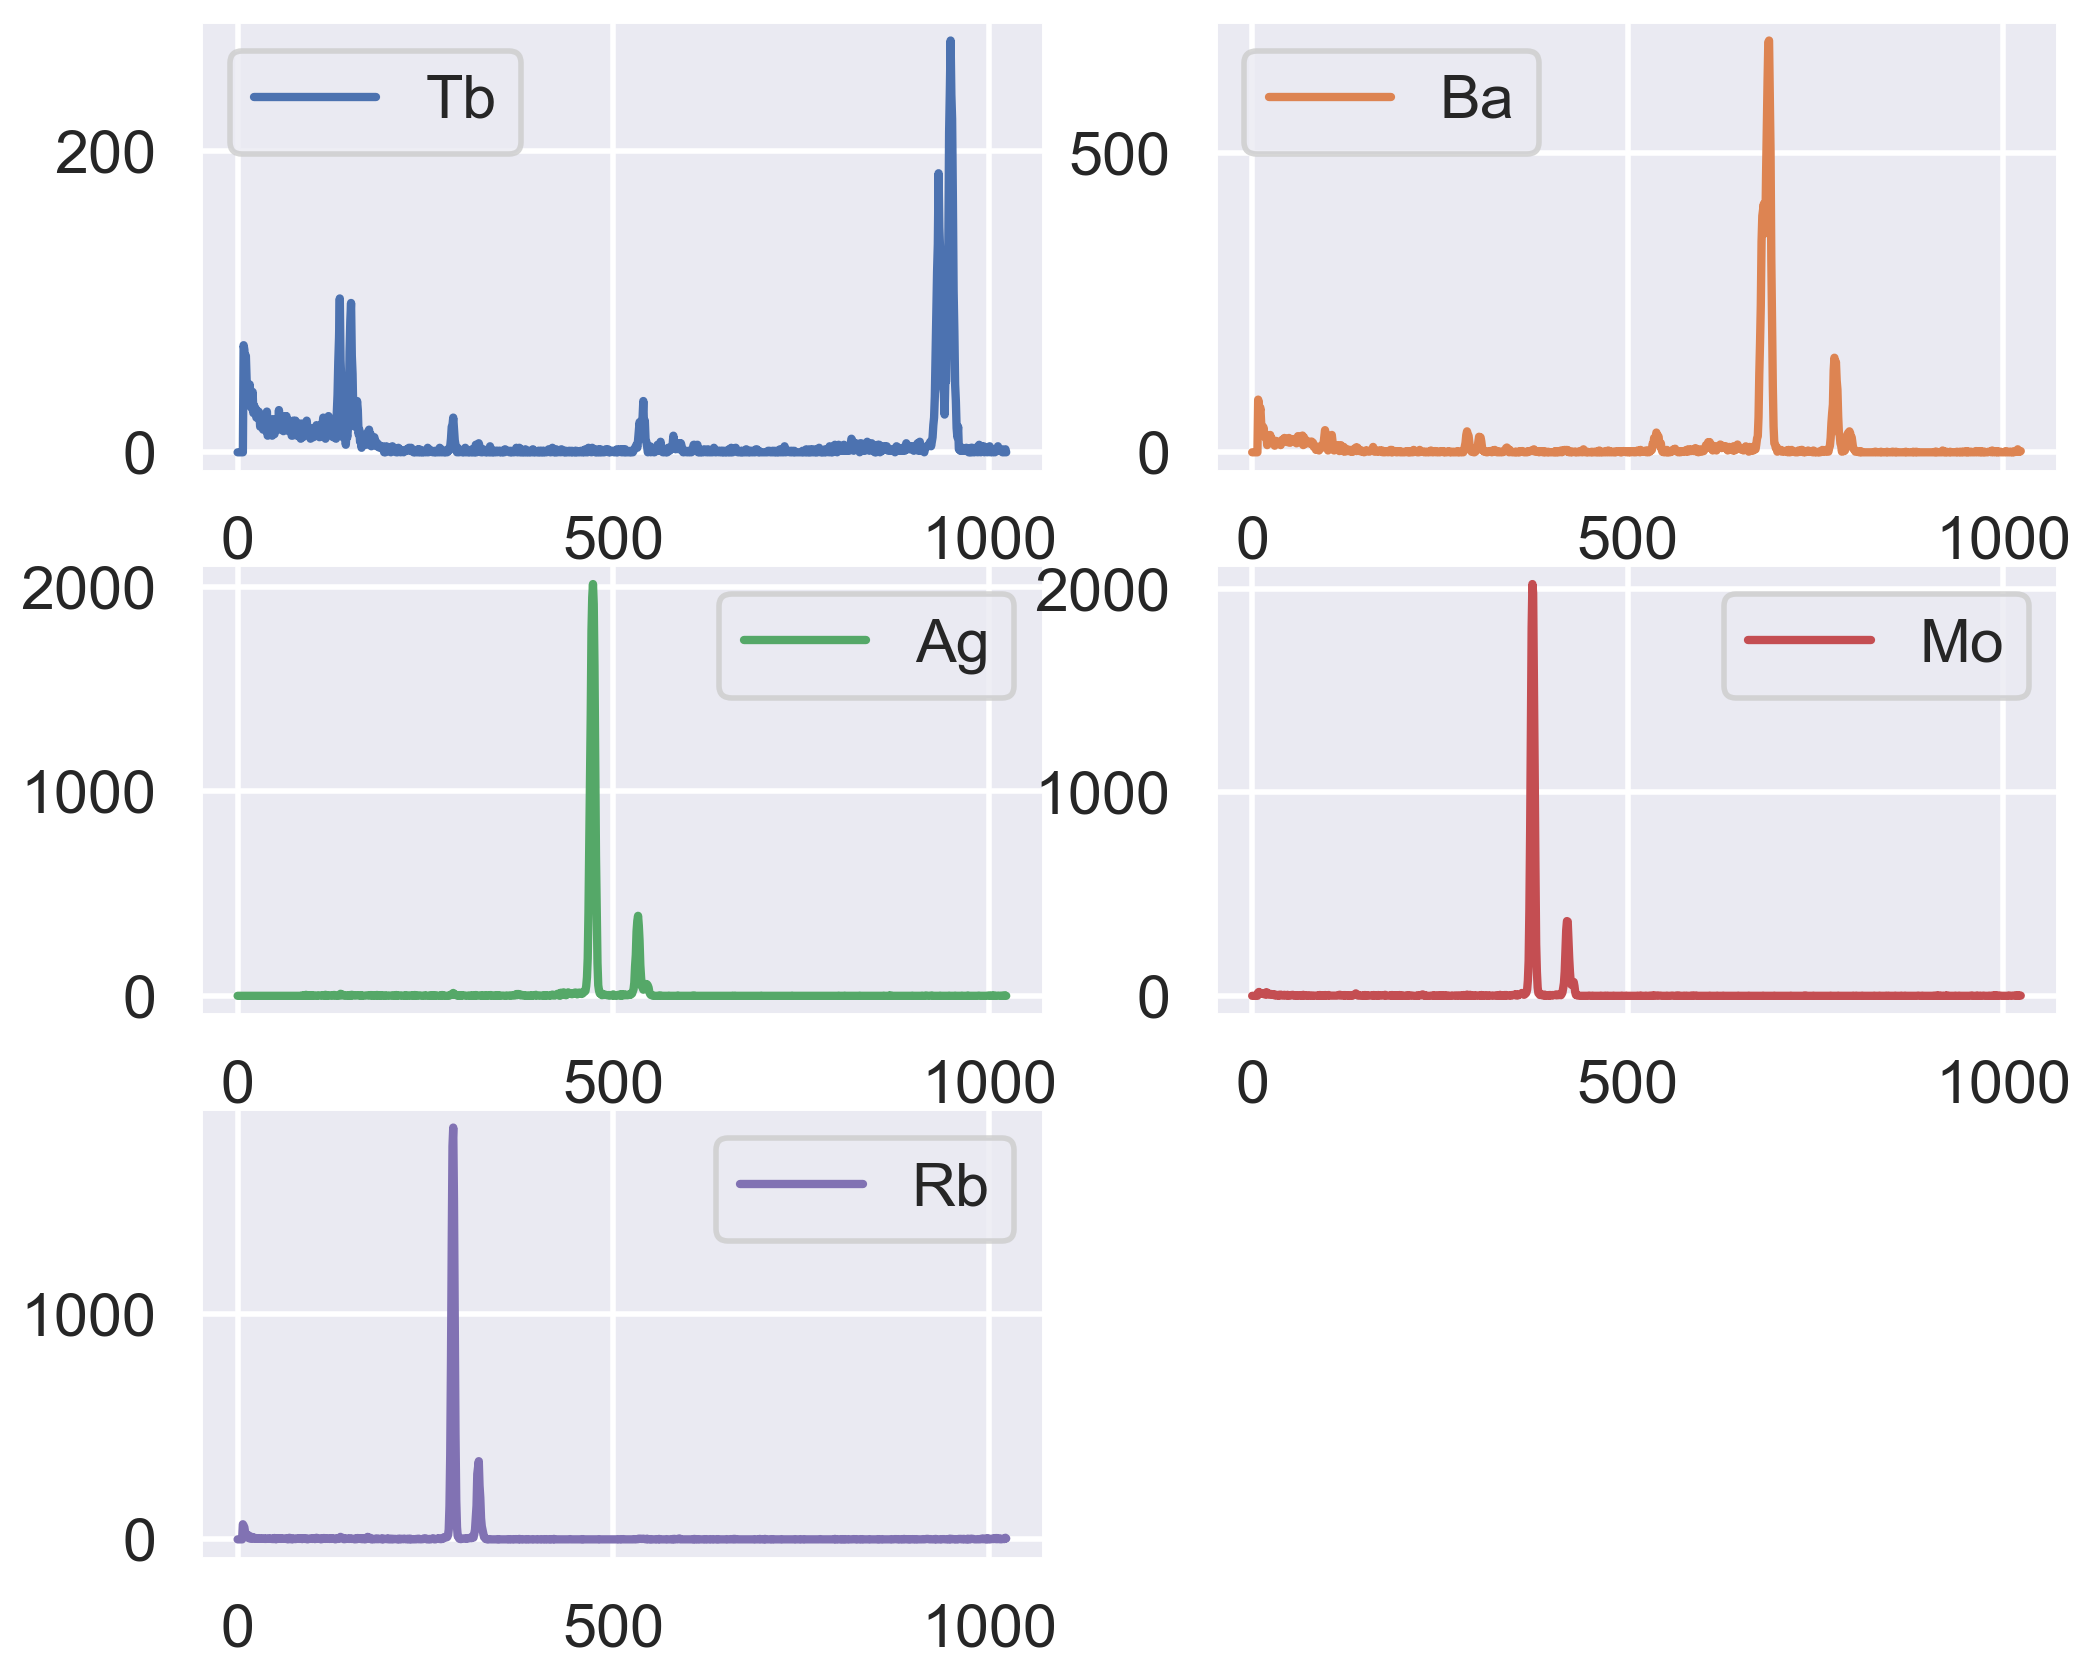

In [10]:
axes = element_datas.plot(subplots=True, layout=(3, 2),figsize=(12, 10),sharex=False)
axes = axes.flatten()
fig = axes[0].get_figure()

Tb [949]
{'prominences': array([273.]), 'left_bases': array([914], dtype=int64), 'right_bases': array([973], dtype=int64)}
Ba [688]
{'prominences': array([688.]), 'left_bases': array([594], dtype=int64), 'right_bases': array([713], dtype=int64)}
Ag [473]
{'prominences': array([2013.]), 'left_bases': array([429], dtype=int64), 'right_bases': array([510], dtype=int64)}
Mo [373]
{'prominences': array([2022.]), 'left_bases': array([335], dtype=int64), 'right_bases': array([436], dtype=int64)}
Rb [287]
{'prominences': array([1828.]), 'left_bases': array([263], dtype=int64), 'right_bases': array([332], dtype=int64)}


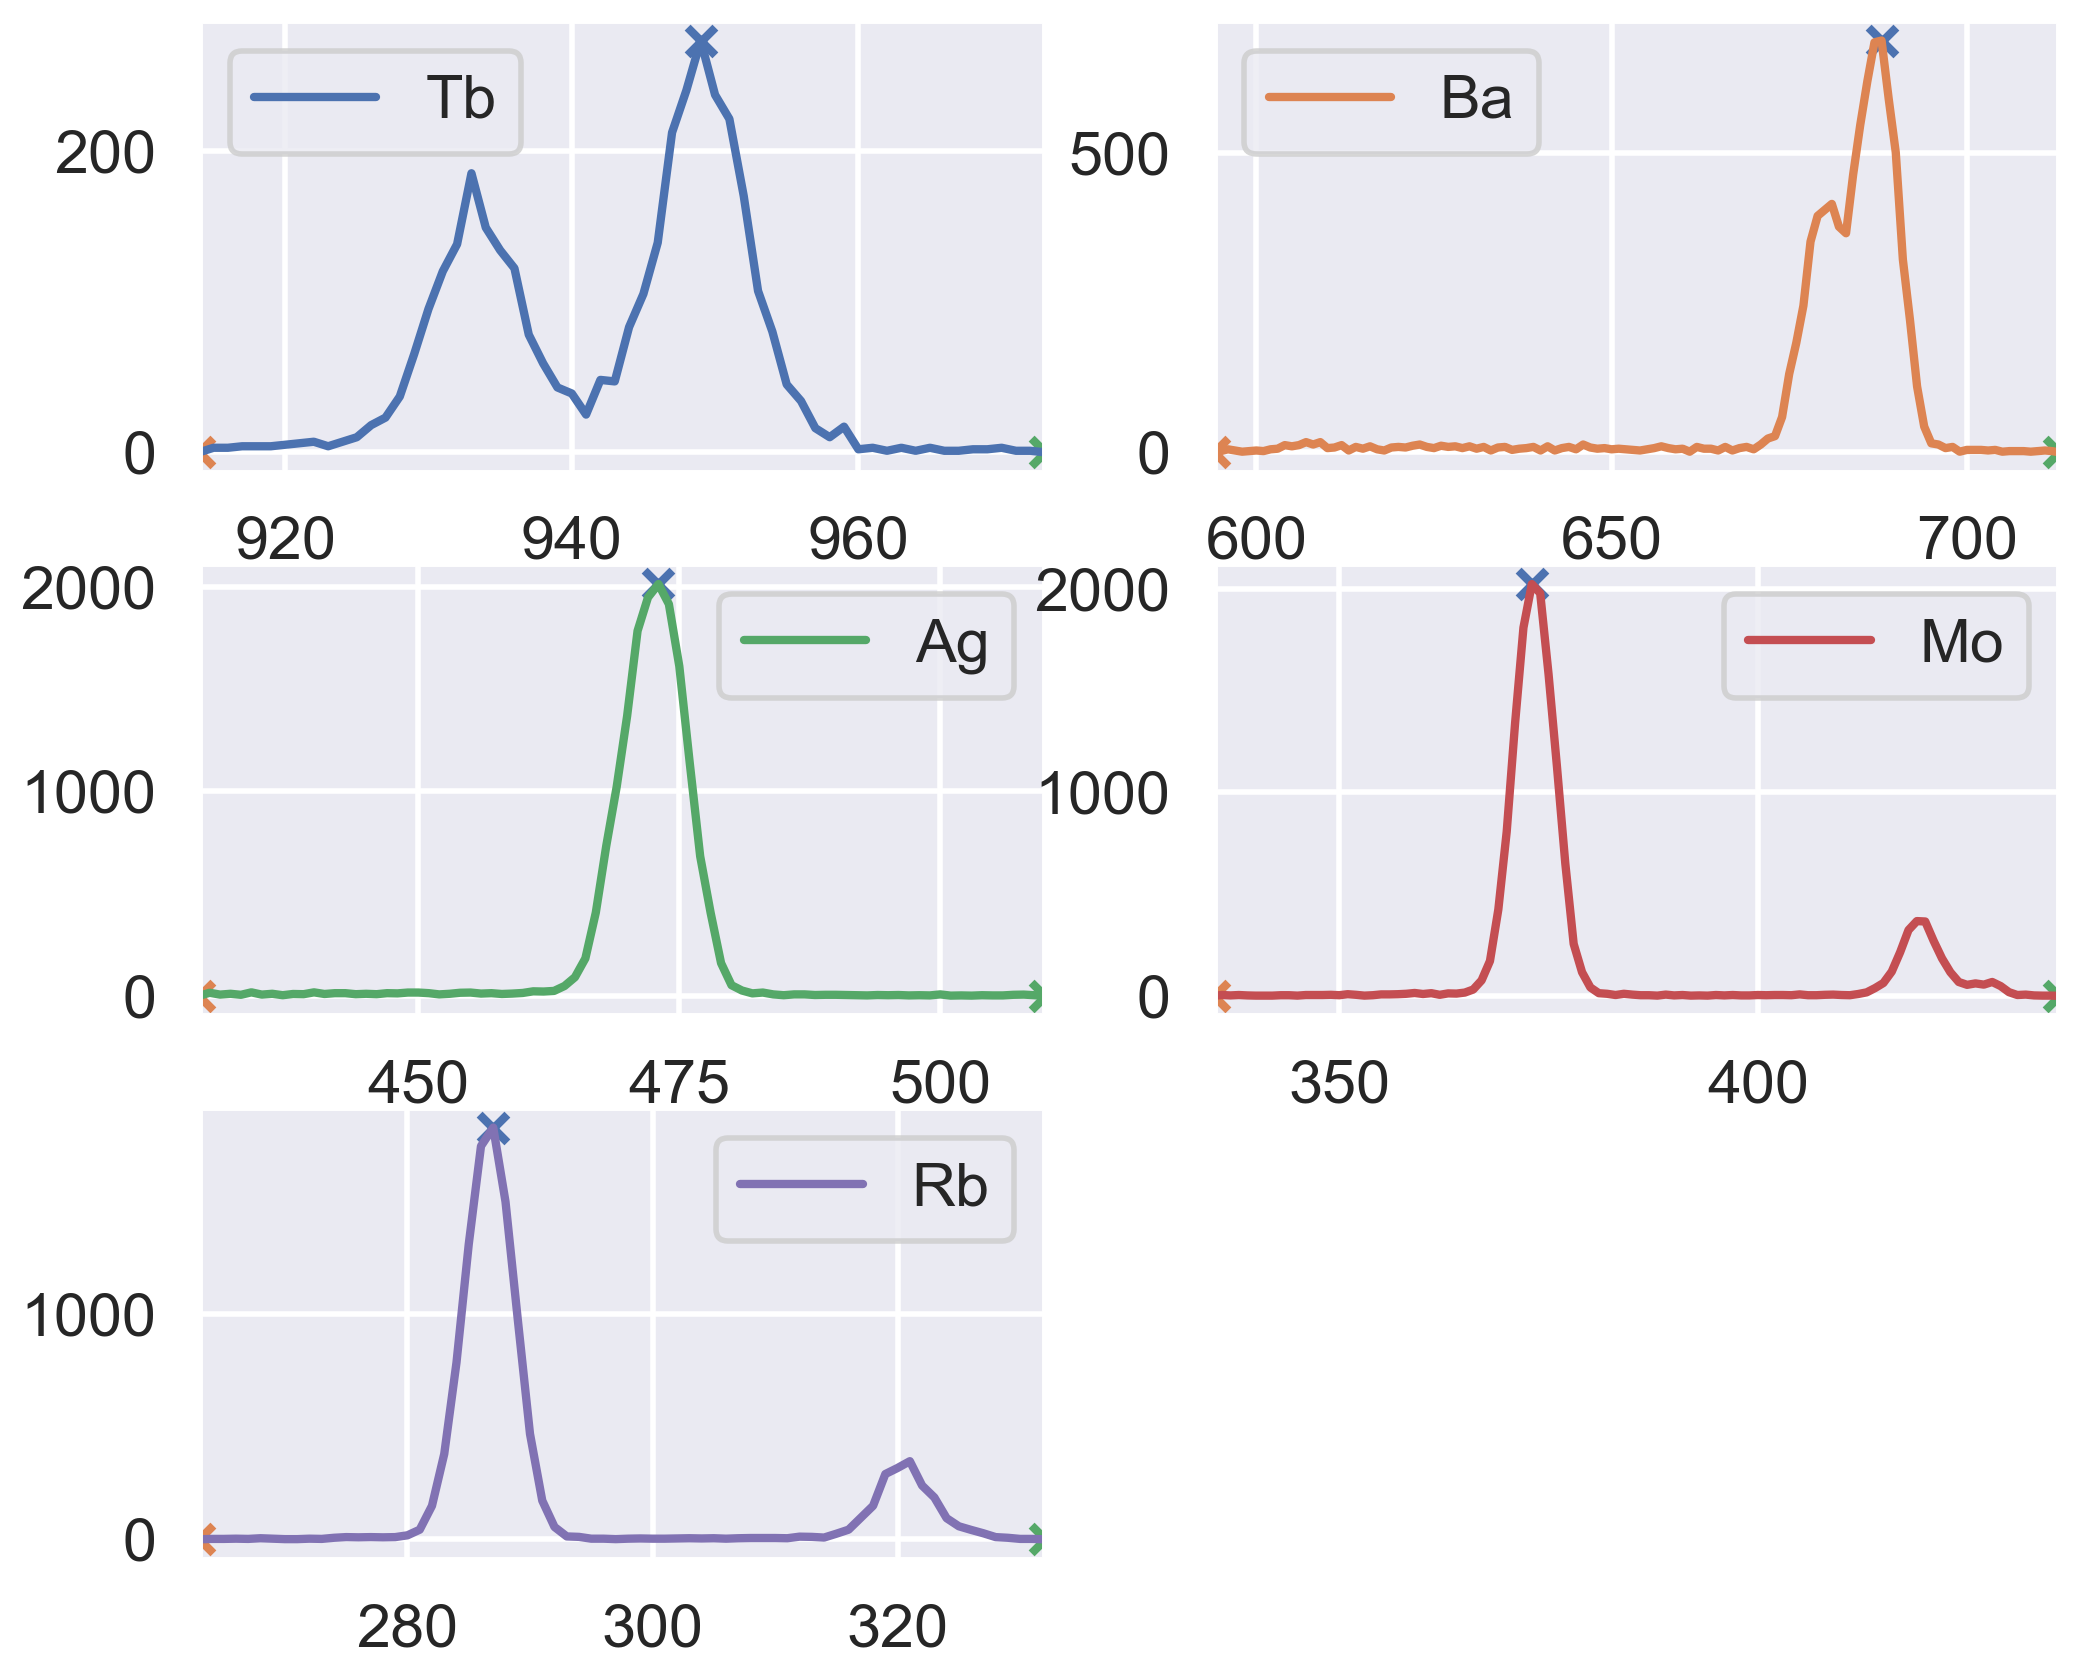

[949, 688, 473, 373, 287]

In [11]:
element_peaks = []
pros = [200,500,2000,2000,1500]
for col,ax,pro in zip(element_datas.columns,axes,pros):
    peaks,info = find_peaks(element_datas[col],prominence=pro)
    print(col,peaks)
    element_peaks.append(peaks[0])
    ax.scatter(peaks,element_datas[col][peaks],s = 100,marker= 'x')
    ax.scatter(info['left_bases'],element_datas[col][info['left_bases']],s = 100,marker= 'x')
    ax.scatter(info['right_bases'],element_datas[col][info['right_bases']],s = 100,marker= 'x')
    ax.set_xlim(info['left_bases'][0],info['right_bases'][0])
    print(info)
display(fig)
element_peaks

In [12]:
celebration_result = pd.read_csv('Xray_data.csv')
celebration_result['channel']=element_peaks
celebration_result

,element,Xray(most),channel
0,Tb,44482.0,949
1,Ba,32194.0,688
2,Ag,22163.0,473
3,Mo,17480.0,373
4,Rb,13396.0,287


[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 5
    # variables        = 2
    chi-square         = 0.00294421
    reduced chi-square = 9.8140e-04
    Akaike info crit   = -33.1867672
    Bayesian info crit = -33.9678914
    R-squared          = 0.99999530
[[Variables]]
    slope:      0.04690424 +/- 5.8724e-05 (0.13%) (init = 1)
    intercept: -0.04194804 +/- 0.03542127 (84.44%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.9185


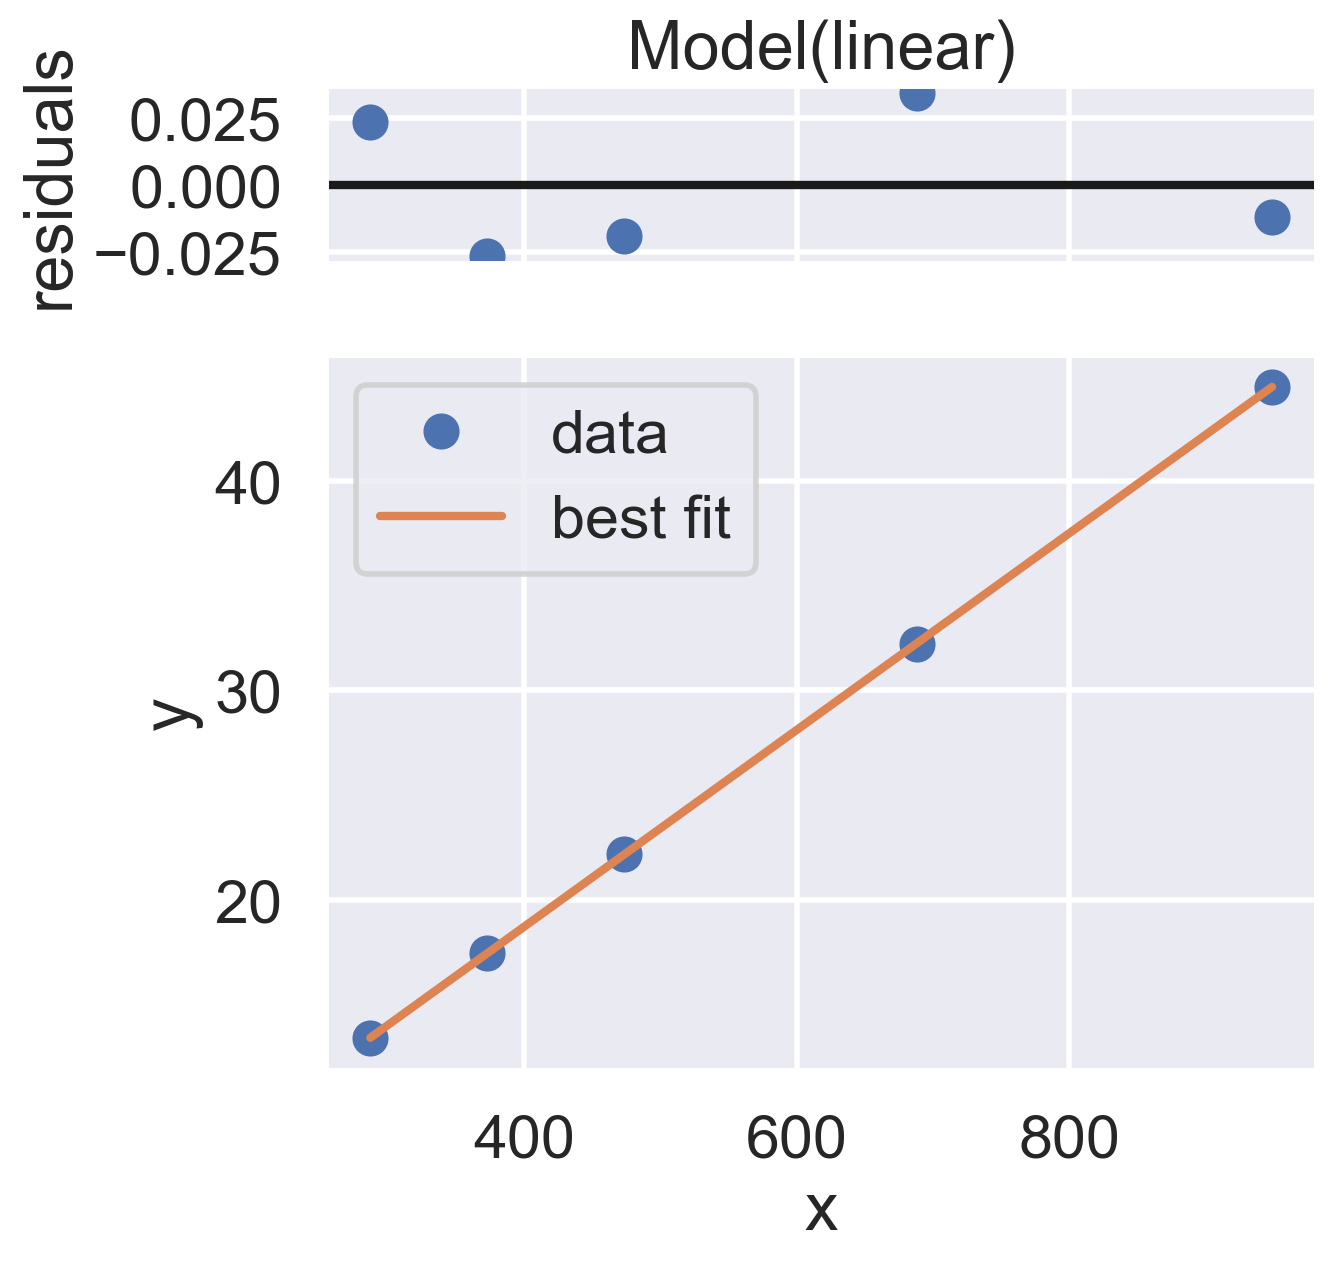

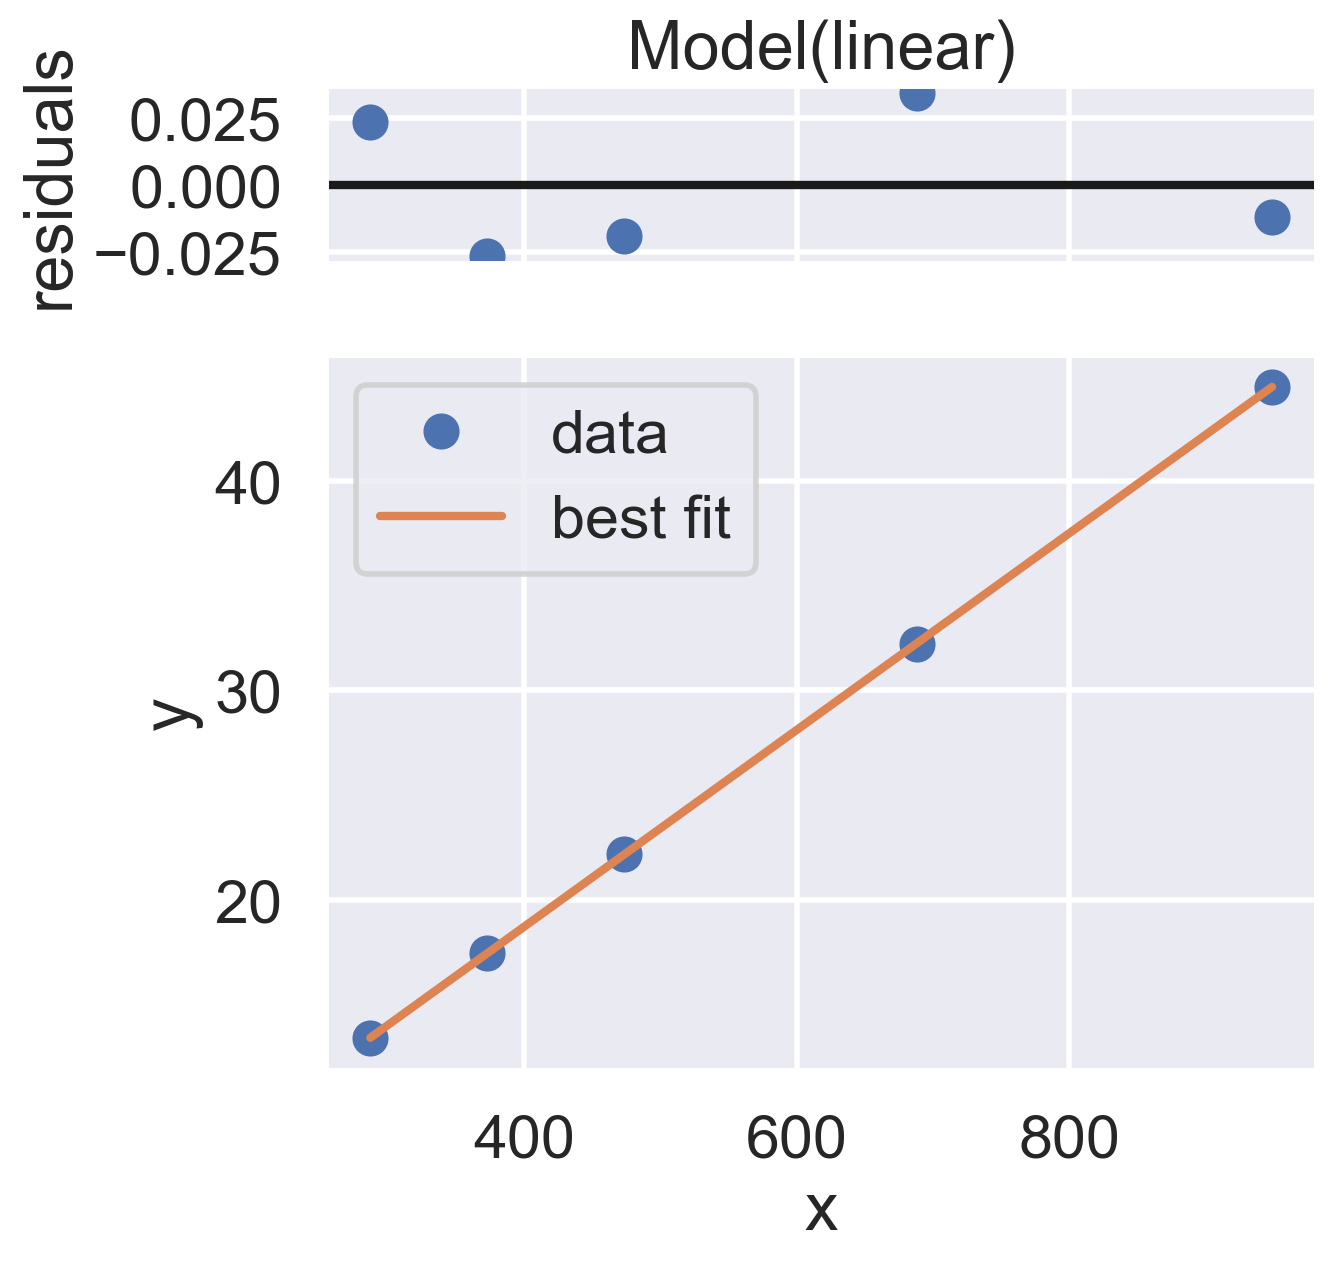

In [13]:
model = LinearModel()

result = model.fit(celebration_result['Xray(most)'].values/1000, x=celebration_result['channel'].values)

# result.plot()
print(result.fit_report())
result.plot()

2 peaks found.


<Axes: title={'center': "(Model(voigt, prefix='V0_') + Model(voigt, prefix='V1_'))"}, xlabel='x', ylabel='y'>

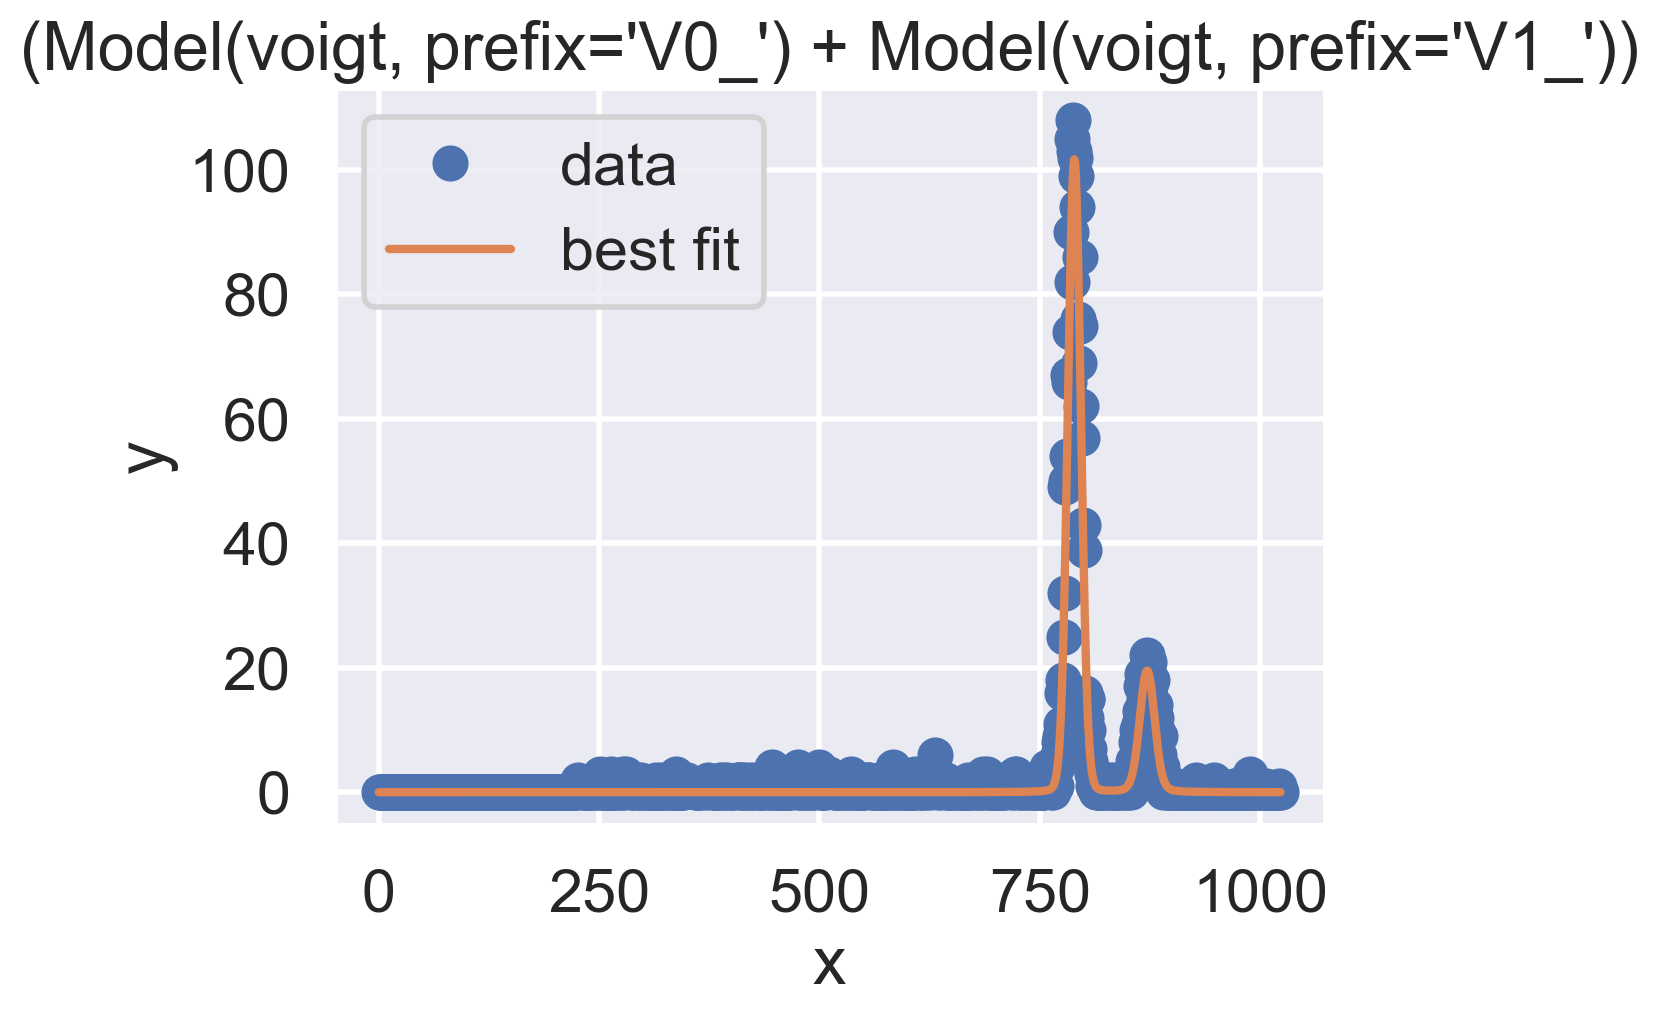

In [15]:
from peak_fitting import peak_fitting

data = open_mca_data(r'raw_data\Cu25_6.mca')
# peaks,info = find_peaks(data, prominence=20,width = 10)
result = peak_fitting(data, prominence=20,width = 10,peak_type='V')

result.plot_fit()